In [23]:
import matplotlib.pyplot as plt
import numpy as np
from openpyxl import load_workbook
import pandas as pd

In [2]:
#function that takes a integer inputs for dates in the format MM,DD,YYYY and outputs a price
def natGasPrice(find):
    lower = allprices[find]
    upper = allprices[find + 1]
    return np.interp(day, [0, 30.5], [lower, upper])#30.5 average days per month


In [5]:
#function to make code less messy but still messy
def findDate(month, day, year):
    find = 0
    for i in range(year - 2021):
        find += 12
    for i in range(month):
        find += 1
    if year == 2020:
        if month == 10:
            return 0
        elif month == 11:
            return 1
        else:
            return 2
    return find + 2



In [7]:
while True:
    print("Enter a date between the dates 10/31/2020 and 10/31/2025 for an estimate of the natrual gas price on that day")
    year = int(input("Enter year: "))
    month = int(input("Enter a month: "))
    day = int(input("Enter a day: "))
    if year == 2020: #stop invalid input when year is 2020 or 2025
        if month < 10 or month > 12 or day < 1 or day > 31:
            print("\nInput not valid\n")
    elif year == 2025:
        if month > 10 or month < 1 or day < 1 or day > 31:
            print("\nInput not valid\n")
    elif year > 2025 or year < 2020 or month < 1 or month > 12 or day > 31 or day < 1: #stop invalid input
            print("\nInput not valid\n")
    else:
        break


Enter a date between the dates 10/31/2020 and 10/31/2025 for an estimate of the natrual gas price on that day


Enter year:  2021
Enter a month:  3
Enter a day:  12


In [9]:
workbook = load_workbook(filename="Nat_Gas.xlsx")
ws = workbook.active

dates = []
prices = []

In [10]:
for col in ws['A']:
    dates.append(col.value)
dates.remove('Dates')

for col in ws['B']:
    prices.append(col.value)
prices.remove('Prices')

col = 0
row = 0
larray = np.zeros((12,4))#12 months 4 years of data

In [11]:
#sorting data into months
for int, price in enumerate(prices):
    if row == 12:
        row = 0
        col += 1
    larray[row][col] = price
    row += 1

In [12]:
#finding average rise each year in specific months
avgmonth = np.zeros((12,3))
avg = []
for i in range(12):
    for j in range(3):
        avgmonth[i][j] = larray[i][3-j] - larray[i][2-j]

In [15]:
# Convert prices to numeric (if they contain strings)
prices = np.array(prices, dtype=float)

# Convert avgmonth to numeric (if needed)
avgmonth = np.array(avgmonth, dtype=float)

# Initialize extprices with the last 12 months' prices
extprices = prices[-12:].copy()  # Copy to avoid modifying original data

#avg change per month over the 4 years
extprices = prices[-12:]
for i in range(12):
    extprices[i] += (avgmonth[i][0]+avgmonth[i][1]+avgmonth[i][2])/3


In [17]:
allprices = np.concatenate((prices, extprices))
foundDate = findDate(month, day, year)
chosen = round(natGasPrice(foundDate), 2)


Text(0.5, 1.0, 'Natrual Gas Price Data with Extrapolation 10/31/20 - 10/31/25')

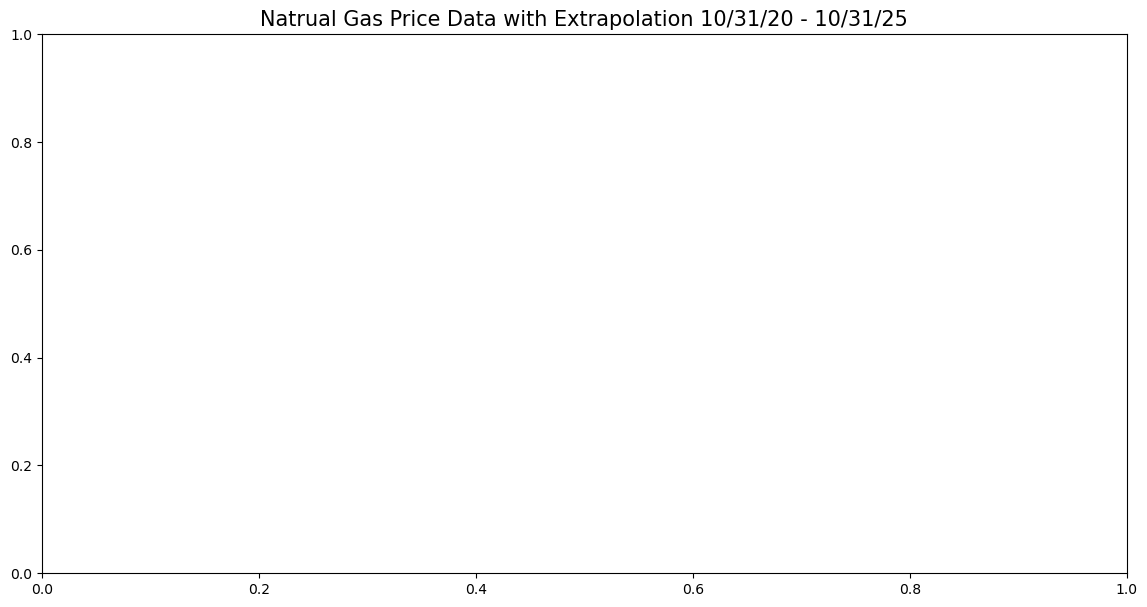

In [18]:
# for visualisation
plt.figure(figsize=[14, 7])
plt.title("Natrual Gas Price Data with Extrapolation 10/31/20 - 10/31/25", fontsize = 15)

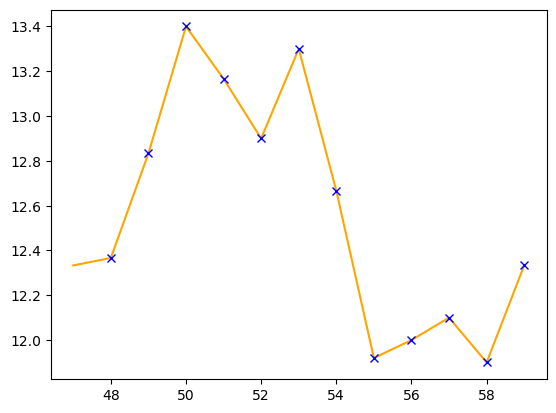

In [19]:
#extrapolated data
plt.plot(np.arange(len(dates), len(dates)+12, 1), extprices, color = 'orange', label = 'Extrapolated Data 2025')
plt.plot([len(dates)-1, len(dates)], [prices[-1], extprices[0]], color = 'orange')
plt.plot(np.arange(len(dates), len(dates)+12, 1), extprices, color = 'blue', marker = 'x', linestyle = 'none', label = 'Extrapolated Data Points')




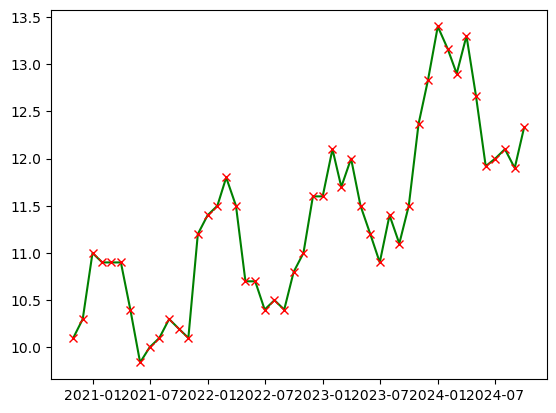

In [20]:
#gas price data
plt.plot(dates, prices, label = 'Actual Data 2021-2024', color = 'green')
plt.plot(dates, prices, 'x', color = 'red', label = 'Data Points ')



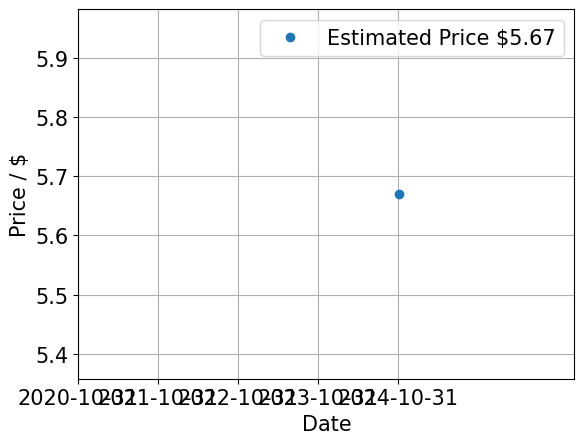

In [25]:
#chosen date
# Example list of dates (Ensure all are datetime objects)
dates = pd.to_datetime(["2020-10-31", "2021-10-31", "2022-10-31", "2023-10-31"])

# Convert "10/31/24" to datetime before adding it to the list
dates = list(dates)  # Convert from Pandas Series to Python list
dates.append(pd.to_datetime("10/31/24", format="%m/%d/%y"))  # Fix the error

# Example chosen price
foundDate = dates[-1]
chosen = 5.67  # Example value

# Plot estimated price point
plt.plot(foundDate + pd.Timedelta(days=0.5), chosen, 'o', label=f'Estimated Price ${chosen}')

plt.xlabel('Date', fontsize=15)
plt.ylabel('Price / $', fontsize=15)

# Set xticks properly using only datetime objects
plt.xticks(dates)  # Ensure all tick labels are datetime

plt.tick_params('both', labelsize=15)
plt.grid()
plt.legend(fontsize=15)
plt.show()
